In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


crypto_path = "resources/cleaned_crypto.csv"
gold_path = "resources/gold_monthly_csv.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)

crypto_data.head(10)

,Unnamed: 0,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day
0,0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0,2016,1,1
1,1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0,2016,1,2
2,2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0,2016,1,3
3,3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,1,4
4,4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,1,5
5,5,2016-01-06,34042500.0,429.11,6.458942e+09,-0.006377,-0.006598,Bitcoin,0.0,BTC,1.0,2016,1,6
6,6,2016-01-07,87562200.0,458.05,6.896279e+09,0.067710,0.067442,Bitcoin,0.0,BTC,1.0,2016,1,7
7,7,2016-01-08,56993000.0,453.23,6.825700e+09,-0.010234,-0.010523,Bitcoin,0.0,BTC,1.0,2016,1,8
8,8,2016-01-09,32278000.0,447.61,6.742767e+09,-0.012150,-0.012400,Bitcoin,0.0,BTC,1.0,2016,1,9
9,9,2016-01-10,35995900.0,447.99,6.750440e+09,0.001138,0.000849,Bitcoin,0.0,BTC,1.0,2016,1,10


In [58]:
#mc_mean = no_null_crypto_data_1.groupby(["crypto_name","trade_year"]).agg({"market_cap" : "mean"})

#d1 = mc_mean.set_index(['crypto_name', 'trade_year']).market_cap.unstack(['crypto_name'])
#d1 = mc_mean.pct_change().stack([0,1]).reset_index()
#mc_mean = mc_mean.merge(d1, on=['crypto_name', 'trade_year'], how='left')
#mc_mean.rename(columns={0: 'pct'}, inplace=True)
#mc_mean.head(30)

#mc_mean['pct'] = mc_mean.sort_values('trade_year').groupby(['Company', 'Group']).market_cap.pct_change()
#mc_mean.head(30)

In [59]:
#mc_mean_2 = no_null_crypto_data_1[["crypto_name","trade_year","market_cap"]]

##mc_mean_2["trade_year"] = pd.to_datetime(mc_mean_2["trade_year"])

#mc_mean_2.sort_values(["crypto_name", "trade_year"], inplace= True, ascending=False)

#mc_mean_2.head(10)

#mc_mean_2['pct_ch'] = (mc_mean_2.groupby('crypto_name')['market_cap'].apply(pd.Series.pct_change) + 1)

#print(mc_mean_2)

#mc_mean_2.to_csv("mc_mean.csv", index = False)

In [98]:
##Finding the top and bottom 5 performers based on the increase/decrease rate of the yearly average market cap

mc_mean = crypto_data.groupby(["crypto_name","trade_year"]).agg({"market_cap" : "mean"})

mc_mean= mc_mean[mc_mean['market_cap'] != 0]
mc_mean['pct_ch'] = (mc_mean.groupby('crypto_name')['market_cap'].apply(pd.Series.pct_change) + 1)

mc_mean.head(30)

,,market_cap,pct_ch
crypto_name,trade_year,,
BridgeCoin,2020,3742.810000,0.000551
Jiyo [OLD],2019,812.632836,0.000794
Experience Points,2020,2183.948969,0.001491
LRM Coin,2020,312.335209,0.002084
Japan Content Token,2020,60845.412584,0.002095


In [116]:
top_df = mc_mean.sort_values(["pct_ch"], ascending=False)
top_df = top_df.head(5)

bottom_df = mc_mean.sort_values(["pct_ch"], ascending=True)
bottom_df = bottom_df.head(5)


top_df

,,market_cap,pct_ch
crypto_name,trade_year,,
Innovative Bioresearch Classic,2020,6.299564e+14,3.874139e+10
Espers,2017,2.909701e+06,3.028381e+05
Acash Coin,2020,1.924524e+08,2.245495e+04
Pura,2017,2.342453e+07,6.423314e+03
Helper Search Token,2020,6.771548e+06,2.731616e+03


In [129]:
top_df = top_df.reset_index()
bottom_df = bottom_df.reset_index()
bottom_df

,index,crypto_name,trade_year,market_cap,pct_ch
0,0,BridgeCoin,2020,3742.810000,0.000551
1,1,Jiyo [OLD],2019,812.632836,0.000794
2,2,Experience Points,2020,2183.948969,0.001491
3,3,LRM Coin,2020,312.335209,0.002084
4,4,Japan Content Token,2020,60845.412584,0.002095


<AxesSubplot:xlabel='crypto_name'>

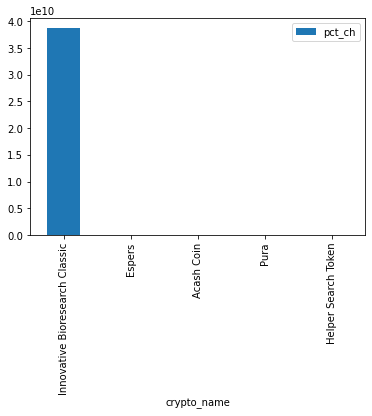

In [126]:
top_df.plot.bar(x='crypto_name', y='pct_ch')

<AxesSubplot:xlabel='crypto_name'>

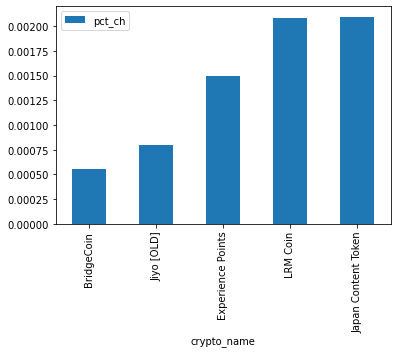

In [128]:
bottom_df.plot.bar(x='crypto_name', y='pct_ch')